In [ ]:
# KEEP SAFE

# def shuffle_sentences(row):
#     word_list = row['text'].split(' ')
#     shuffled_sentance = ' '.join(sample(word_list, len(word_list)))
#     return shuffled_sentance

# shuffled_sentences = data.apply(shuffle_sentences, axis=1)

# data_copy = data.copy()
# data_copy = data_copy.drop('text', axis=1)
# data_copy.insert(1, 'text', shuffled_sentences)

# data = pd.concat([data, data_copy], ignore_index=True)

# data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from keras.utils import pad_sequences

In [2]:
# Original data
data = {'text': ['I love the sunshine', 'Feeling down today', 'This is a happy moment', 'I am sad', 'Great news!', 'Feeling blue'],
        'mood': ['cheerful', 'sad', 'cheerful', 'sad', 'cheerful', 'sad'],
        'gender': ['female', 'male', 'female', 'male', 'female', 'male']}
df = pd.DataFrame(data)


In [3]:
# Label Encoding for 'mood' and 'gender'
label_encoder = LabelEncoder()
df['mood_encoded'] = label_encoder.fit_transform(df['mood'])
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

df

,text,mood,gender,mood_encoded,gender_encoded
0,I love the sunshine,cheerful,female,0,0
1,Feeling down today,sad,male,1,1
2,This is a happy moment,cheerful,female,0,0
3,I am sad,sad,male,1,1
4,Great news!,cheerful,female,0,0
5,Feeling blue,sad,male,1,1


In [4]:
# Split the data into training and testing sets
train_texts, test_texts, train_moods, test_moods, train_genders, test_genders = train_test_split(
    df['text'].values, df['mood_encoded'].values, df['gender_encoded'].values, test_size=0.2, random_state=42
)

print(
    f'x_train shape: {np.shape(train_texts)}\n'
    f'y_train shape: {np.shape(train_moods)}\n'
    f'x_test shape: {np.shape(train_genders)}\n'
    
    f'x_train shape: {np.shape(test_texts)}\n'
    f'y_train shape: {np.shape(test_moods)}\n'
    f'x_test shape: {np.shape(test_genders)}\n'
)

x_train shape: (4,)
y_train shape: (4,)
x_test shape: (4,)
x_train shape: (2,)
y_train shape: (2,)
x_test shape: (2,)



In [5]:
# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_sequences

[[2, 3], [4, 5, 6, 7, 8], [9, 10], [11, 12, 13]]

In [6]:
# Pad sequences to have consistent length
max_sequence_length = max(len(seq) for seq in train_sequences + test_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

train_data

array([[ 0,  0,  0,  2,  3],
       [ 4,  5,  6,  7,  8],
       [ 0,  0,  0,  9, 10],
       [ 0,  0, 11, 12, 13]])

Epoch 1/100
2/2 [==============================] - 8s 1s/step - loss: 0.6946 - accuracy: 0.0000e+00 - val_loss: 0.6944 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6925 - accuracy: 0.6667 - val_loss: 0.6946 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6915 - accuracy: 0.6667 - val_loss: 0.6950 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 61ms/step - loss: 0.6904 - accuracy: 1.0000 - val_loss: 0.6977 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 62ms/step - loss: 0.6905 - accuracy: 0.6667 - val_loss: 0.7010 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 65ms/step - loss: 0.6882 - accuracy: 0.6667 - val_loss: 0.7024 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 63ms/step - loss: 0.6867 - accuracy: 0.6667 - val_loss: 0.7053 - val_accuracy: 0

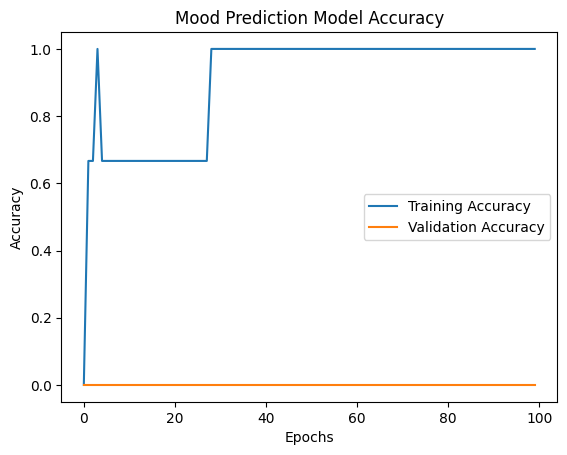

1/1 [==============================] - 0s 45ms/step - loss: 0.1194 - accuracy: 1.0000
Test Accuracy for mood prediction: 100.00%
Epoch 1/100
2/2 [==============================] - 9s 1s/step - loss: 0.6938 - accuracy: 0.3333 - val_loss: 0.6946 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 58ms/step - loss: 0.6927 - accuracy: 0.6667 - val_loss: 0.6946 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 58ms/step - loss: 0.6922 - accuracy: 0.6667 - val_loss: 0.6969 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 60ms/step - loss: 0.6913 - accuracy: 0.6667 - val_loss: 0.6995 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 60ms/step - loss: 0.6914 - accuracy: 0.6667 - val_loss: 0.7024 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 60ms/step - loss: 0.6894 - accuracy: 0.6667 - val_loss: 0.7045 - val_accuracy: 0.0000e+00
Epoch 7/1

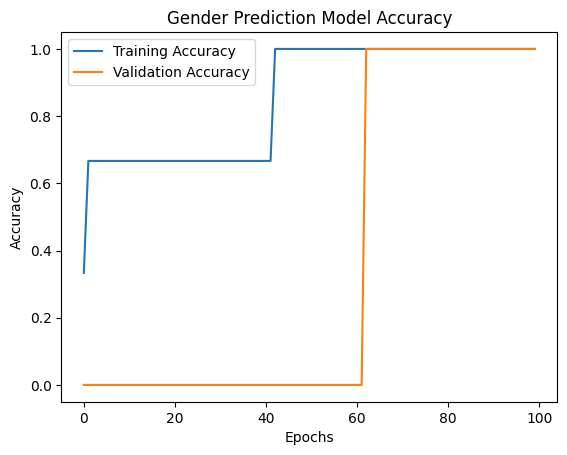

1/1 [==============================] - 0s 55ms/step - loss: 0.1186 - accuracy: 1.0000
Test Accuracy for gender prediction: 100.00%


In [7]:


# Build the LSTM model for mood prediction
embedding_dim = 16
model_mood = Sequential()
model_mood.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model_mood.add(LSTM(32, return_sequences=True))
model_mood.add(LSTM(32))
model_mood.add(Dense(64, activation='relu'))
model_mood.add(Dense(32, activation='relu'))
model_mood.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the mood model
model_mood.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the mood model
history_mood = model_mood.fit(train_data, train_moods, epochs=100, batch_size=2, validation_split=0.2)

# Plot accuracy for mood prediction
plt.plot(history_mood.history['accuracy'], label='Training Accuracy')
plt.plot(history_mood.history['val_accuracy'], label='Validation Accuracy')
plt.title('Mood Prediction Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the mood model on test data
loss_mood, accuracy_mood = model_mood.evaluate(test_data, test_moods)
print(f'Test Accuracy for mood prediction: {accuracy_mood * 100:.2f}%')

# Repeat the process for gender prediction
model_gender = Sequential()
model_gender.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model_gender.add(LSTM(32, return_sequences=True))
model_gender.add(LSTM(32))
model_gender.add(Dense(64, activation='relu'))
model_gender.add(Dense(32, activation='relu'))
model_gender.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the gender model
model_gender.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the gender model
history_gender = model_gender.fit(train_data, train_genders, epochs=100, batch_size=2, validation_split=0.2)

# Plot accuracy for gender prediction
plt.plot(history_gender.history['accuracy'], label='Training Accuracy')
plt.plot(history_gender.history['val_accuracy'], label='Validation Accuracy')
plt.title('Gender Prediction Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the gender model on test data
loss_gender, accuracy_gender = model_gender.evaluate(test_data, test_genders)
print(f'Test Accuracy for gender prediction: {accuracy_gender * 100:.2f}%')

In [9]:
model_gender.predict(train_data)

1/1 [==============================] - 2s 2s/step


array([[9.9855453e-01],
       [5.3072902e-10],
       [3.3394064e-04],
       [8.7867385e-01]], dtype=float32)

In [59]:
# Assume models (model_mood and model_gender) are already trained

# Function to preprocess user input and make predictions
def predict_mood_and_gender(user_input, tokenizer, max_sequence_length, model_mood, model_gender):
    # Tokenize and pad the user input
    input_sequence = tokenizer.texts_to_sequences([user_input])
    padded_input = pad_sequences(input_sequence, maxlen=max_sequence_length)

    # Predict mood
    mood_prediction = model_mood.predict(padded_input)[0, 0]
    predicted_mood = "cheerful" if mood_prediction >= 0.5 else "sad"

    # Predict gender
    gender_prediction = model_gender.predict(padded_input)[0, 0]
    predicted_gender = "female" if gender_prediction >= 0.5 else "male"

    return predicted_mood, predicted_gender

# Example usage
user_input = input("Enter a text: ")
predicted_mood, predicted_gender = predict_mood_and_gender(user_input, tokenizer, max_sequence_length, model_mood, model_gender)

print(f"Predicted Mood: {predicted_mood}")
print(f"Predicted Gender: {predicted_gender}")


1/1 [==============================] - 0s 37ms/step
Predicted Mood: sad
Predicted Gender: male


# RANDOM CODE

In [171]:
import pandas as pd

# Original data
data = {'text': ['I love the sunshine', 'Feeling down male today'],
        'gender': ['female', 'male']}
df = pd.DataFrame(data)

# Manually set some entries in the "gender" column to NaN
df.loc[1, 'gender'] = np.nan  # Setting entry at index 1 to NaN

df


,text,gender
0,I love the sunshine,female
1,Feeling down male today,NaN


In [172]:
key_words = ['male', 'female']


def update_gender(row):
    words = row['text'].split(' ')
    
    print(words)
    
    for key_word in key_words:
        print("ran")
        if key_word in words: return key_word
        else: return row['gender']

         

# Assuming 'gender' and 'text' are columns in your DataFrame
df['gender'] = df.apply(update_gender, axis=1)

df

['I', 'love', 'the', 'sunshine']
ran
['Feeling', 'down', 'male', 'today']
ran


,text,gender
0,I love the sunshine,female
1,Feeling down male today,male


In [198]:
import pandas as pd

# Create a sample DataFrame
data = {'A': [1, 2, 3, 3, 5],
        'B': [6, None, 5, 9, None]}
df = pd.DataFrame(data)

df

,A,B
0,1,6.0
1,2,NaN
2,3,5.0
3,3,9.0
4,5,NaN


In [193]:
# Create a new DataFrame with rows containing NaN values
new_df = df[df['B'].isna()].copy()

# Drop rows with NaN values from the original DataFrame
df.dropna(inplace=True)

new_df

,A,B


In [32]:
import pandas as pd
from random import sample

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'luke', 'aston'],
    'City': ['testing testing 123', 'ff gg', 'this sentence must be readable', 'cool', 'goy vey'],
    'Age': [25, 30, None, 322, 1],
}

data = pd.DataFrame(data)

data

,Name,City,Age
0,Alice,testing testing 123,25.0
1,Bob,ff gg,30.0
2,Charlie,this sentence must be readable,NaN
3,luke,cool,322.0
4,aston,goy vey,1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    tokenized_padded_data,
    onehot_encoded_labels,
    test_size=0.2
)

In [33]:
def shuffle_sentences(row):
    word_list = row['City'].split(' ')
    shuffled_sentance = ' '.join(sample(word_list, len(word_list)))
    return shuffled_sentance

shuffled_sentences = data.apply(shuffle_sentences, axis=1)

data_copy = data.copy()
data_copy = data_copy.drop('City', axis=1)
data_copy.insert(1, 'City', shuffled_sentences)

data = pd.concat([data, data_copy], ignore_index=True)

data

,Name,City,Age
0,Alice,testing testing 123,25.0
1,Bob,ff gg,30.0
2,Charlie,this sentence must be readable,NaN
3,luke,cool,322.0
4,aston,goy vey,1.0
5,Alice,testing 123 testing,25.0
6,Bob,gg ff,30.0
7,Charlie,this be sentence readable must,NaN
8,luke,cool,322.0
9,aston,vey goy,1.0


In [208]:
# Define the column you want to check and the value you are looking for
column_to_check = 'City'
value_to_find = 'San Francisco'


# Alternatively, you can use the DataFrame.query() method to achieve the same result more efficiently
result = df.query(f"{column_to_check} == '{value_to_find}'")
result

,Name,Age,City
1,Bob,30,San Francisco


In [233]:
df

,Name,Age,City
0,Alice,25.0,New York
1,Bob,30.0,You are just a queer to me.
2,Charlie,NaN,Los Angeles


In [234]:
df.dropna()

,Name,Age,City
0,Alice,25.0,New York
1,Bob,30.0,You are just a queer to me.


In [231]:
# Loop over all rows and check if the specified column has the desired value
for index, row in df.iterrows():
    if 'just' in row['City'].split(' '):
        print("asd")


asd
